# Evaluacion Modelo NMF

In [1]:
from pycaret.nlp import *
import cargar_corpus
import pickle
import pandas as pd

session_id = 70521
random_state = session_id

import os
# define the name of the directory to be created
path = "../Experimentos Modelos/NMF/" + "exp-" + str(session_id) +"/"

try:
    os.mkdir(path)
except OSError:
    print ("Creation of the directory %s failed" % path)
else:
    print ("Successfully created the directory %s " % path)
    

#ruta_dataset = "../Dataset/PDF"
#ruta_dataset = "F:/Memoria/Dataset/PDF"

ruta_modelo = path + "NMF-Model"

#dataframe = cargar_corpus.getDataframe_pdf(ruta_dataset)
#data = dataframe
#sample = int(dataframe.shape[0]*.8)
#data = dataframe.sample(sample, random_state=random_state).reset_index(drop=True)
#data_unseen = dataframe.drop(data.index).reset_index(drop=True)

#Cargar DF de pdf's

path_exp = "../Modelo Final/dataset/"
data_train_dir = path_exp + "data_train.df"
data_test_dir = path_exp + "data_test.df"

data = pickle.load(open(data_train_dir, 'rb'))
data_unseen = pickle.load(open(data_test_dir, 'rb'))

Successfully created the directory ../Experimentos Modelos/NMF/exp-70521/ 


In [2]:
custom_stopwords = ['use', 'fig', 'figure' , 'value', 'www', 'org', 'also', 'model', 'ch', 'er_al', 'research', 'researchgate_net', 'year', 
                    'upwelle','however', 'ca','slr','area','sir','reference','page','may','table','show','study',
                    'therefore','thus','may','term','low','sample','result','test','author','prepare','report','que','set',
                    'column','moreover','find','read','total','author_funder_granted_biorxiv','holder_preprint_peer_reviewe',
                    'licence_display_preprint_perpetuity','rights_reserved_reuse_allowe','biorxiv_preprint_first_poste',
                    'content_courtesy_springer_nature','terms_apply_rights_reserve','university_chicago_press','conditions_http_journal',
                    'content_downloaded_march_subject','reviews_aquaculture_author','reviews_aquaculture_published_john','publication',
                    'time','funder_granted_biorxiv_license','display_preprint_perpetuity_right','authors_publication_working_relate',
                    'reserved_reuse_allowed_without',
                    'user_requested_enhancement_downloaded','view_project_content_followe','upload','international_license_permit',
                    'sharing_adaptation_distribution_reproduction','claims_published_maps_institutional',
                    'creative_commons_license','intended_permitted_statutory_regulation','exceeds_permitted_need','open_acces_article_license',
                    'creative_commons_attribution','international_license_permit','copyright_holder_view','preprints_preprints_peer_reviewe',
                    'preprint','posted_june_doi','university_concepcion_publications_citation','deem',
                    'publications_citations_publications_citation','authors_working_related_projects','synthesis','introduction','owe',
                    'scientific','average','september_user_requeste','source','type','old','field','single','day',
                    'https_researchgate_net','victor_roberto_parra_sanchez','university_concepcion','universidad','related_project',
                    'view_project','january_user_requested','profile','student', 'manuel', 'professor_department','dynamic', 'calculation',
                    'general', 'context', 'valid', 'experimental','eq','email','citations_reads_authors_include',         
                    
                    
                    'article', 'technology', 'citations_reads_authors_include', 'university_concepcion_publications_citation', 
                    'katia_saez_university_concepcion','katia_saez_university_publication',
                    'authors_working_related_project', 'view_project_content_following', 'puerto', 'file', 'registered_office_mortimer_house',
                    'wt', 'environmental', 'detail', 'include', 'instruction', 'authors_subscription', 'information', 'doi_citations_read',
                    'authors_include',
                    'faculty', 'department','whatsoever_howsoever_cause', 'arising_directly_indirectly','access', 'found_http_tandfonline',
                    'com', 'condition','received_august_accepte','concepcion','box', 'plot',
                    
                    'able', 'others','above-mentioned otherwise','accordingly', 'overall','across', 'rather','along', 'remarkably','already',
                    'significantly', 'alternatively simply','always sometimes','among specifically','and','or', 'straight', 'forward','anything',
                    'substantially', 'anywhere', 'thereafter','better', 'therebetween','disclosure', 'therefor','due','therefrom', 'easily', 'therein', 'easy',
                    'thereinto+','eg', 'thereon', 'either', 'therethrough','university','whatsoever','distribution_form_anyone',
                    'expressly_forbidden','follow', 'additionally', 'analysis','distribution',
                    'elsewhere', 'therewith','enough','together','especially', 'toward',  'essentially', 'towards','et al','typical', 'etc', 'typically',
                    'eventually', 'upon', 'excellent', 'via', 'finally', 'vice versa',
                    'furthermore', 'whatever','good', 'whereas','hence', 'whereat','he','she', 'wherever','him','her', 'whether','his','her',
                    'whose','ie', 'within', 'ii', 'without', 'iii', 'yet', 'instead', 'later', 'like', 'little', 'many', 'may', 'meanwhile',
                    'might','moreover','much','must','never','often','line','phase','cycle',
                    
                    'increase', 'effect', 'induce', 'activity', 'estimate', 'high', 'unit', 'download', 'material', 'follow', 'example', 'level', 
                    'variable', 'see', 'present', 'citation', 'distribution', 'equation', 'document', 'paper', 'citation_recomendation', 'pag',
                    'stre', 'non', 'enchufetv', 'solution', 'problem', 'method', 'function', 'case', 'consider', 'order', 'give', 'obtain', 'theorem',
                    'define','process','system', 'section', 'numerical', 'first', 'second', 'error', 'base', 'element',
                    'item', 'measurement','could', 'need', 'datum', 'image', 'let', 'assume', 'proof', 'denote', 'constant', 'unknown',

                    'review', 'publish', 'copyright', 'abstract', 'factor', 

                    
                    
]

In [3]:
nmf_exp = setup(data = data, target = 'text', session_id = session_id, custom_stopwords = custom_stopwords)
#custom_grid = [2,4,6,8,10,12,14,16,18,20,22,24,26,28]

num_topics = 14

nmf = create_model('nmf', num_topics = num_topics, multi_core = True)

save_model(nmf, ruta_modelo)

Model Succesfully Saved


(NMF(alpha=0.0, beta_loss='frobenius', init='nndsvd', l1_ratio=0.0, max_iter=200,
     n_components=14, random_state=70521, shuffle=False, solver='cd', tol=0.0001,
     verbose=0),
 '../Experimentos Modelos/NMF/exp-70521/NMF-Model.pkl')

In [4]:
train_data_ = get_config('data_') #pandas.DataFrame containing text after all processing
train_tokenized_words = get_config('text') #Tokenized words as a list with length = # documents
train_corpus = get_config('corpus') #List containing tuples of id to word mapping
train_id2word = get_config('id2word')

train_data_dir = path + "train_data_.sav"
train_tokenized_words_dir = path + "train_tokenized_words.sav"
train_corpus_dir = path + "train_corpus.sav"
train_id2word_dir = path + "train_id2word.sav"

pickle.dump(train_data_, open(train_data_dir, 'wb'))
pickle.dump(train_tokenized_words, open(train_tokenized_words_dir, 'wb'))
pickle.dump(train_corpus, open(train_corpus_dir, 'wb'))
pickle.dump(train_id2word, open(train_id2word_dir, 'wb'))

In [5]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


vectorizer = TfidfVectorizer(analyzer='word',       
                                min_df=10,                        # minimum read occurences of a word 
                                stop_words='english',             # remove stop words
                               lowercase=True,                   # convert all words to lowercase
                                token_pattern='[a-zA-Z0-9]{3,}',  # num chars > 3
                                # max_features=50000,             # max number of uniq words
                                )

data_vectorized = vectorizer.fit_transform(train_data_.text)

In [6]:
X = nmf.fit_transform(data_vectorized)
Y = nmf.components_

In [7]:
document_topic_matrix = pd.DataFrame(X)
topic_word_matrix = pd.DataFrame(Y)

In [8]:
document_topic_matrix_dir = path + "document_topic_matrix.sav"
pickle.dump(document_topic_matrix, open(document_topic_matrix_dir, 'wb'))

topic_word_matrix_dir = path + "topic_word_matrix.sav"
pickle.dump(topic_word_matrix, open(topic_word_matrix_dir, 'wb'))


nmf_train_results = assign_model(nmf)
nmf_train_results = nmf_train_results.drop(columns=['text'])
nmf_train_results_dir = path + "nmf_train_results.df"
pickle.dump(nmf_train_results, open(nmf_train_results_dir, 'wb'))

In [9]:
plot_model(nmf, plot = 'topic_distribution')
#plot_model(tuned_unsupervised, plot = 'wordcloud', topic_num = topic_num)
#plot_model(tuned_unsupervised, plot = 'frequency', topic_num = topic_num)
#plot_model(tuned_unsupervised, plot = 'distribution', topic_num = topic_num)
#plot_model(tuned_unsupervised, plot = 'sentiment', topic_num = topic_num)
#plot_model(tuned_unsupervised, plot = 'pos', topic_num = topic_num)
#plot_model(tuned_unsupervised, plot = 'bigram', topic_num = topic_num)
#plot_model(tuned_unsupervised, plot = 'trigram', topic_num = topic_num)

In [10]:
evaluate_model(nmf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Frequency Plot', 'freque…

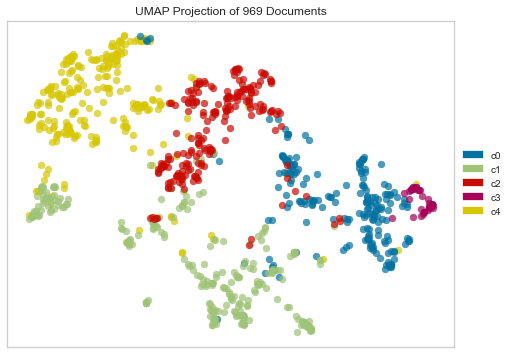

In [11]:
plot_model(nmf, plot = 'tsne')

plot_model(nmf, plot = 'umap')

#plot_model(model, plot = 'topic_model')

<AxesSubplot:>

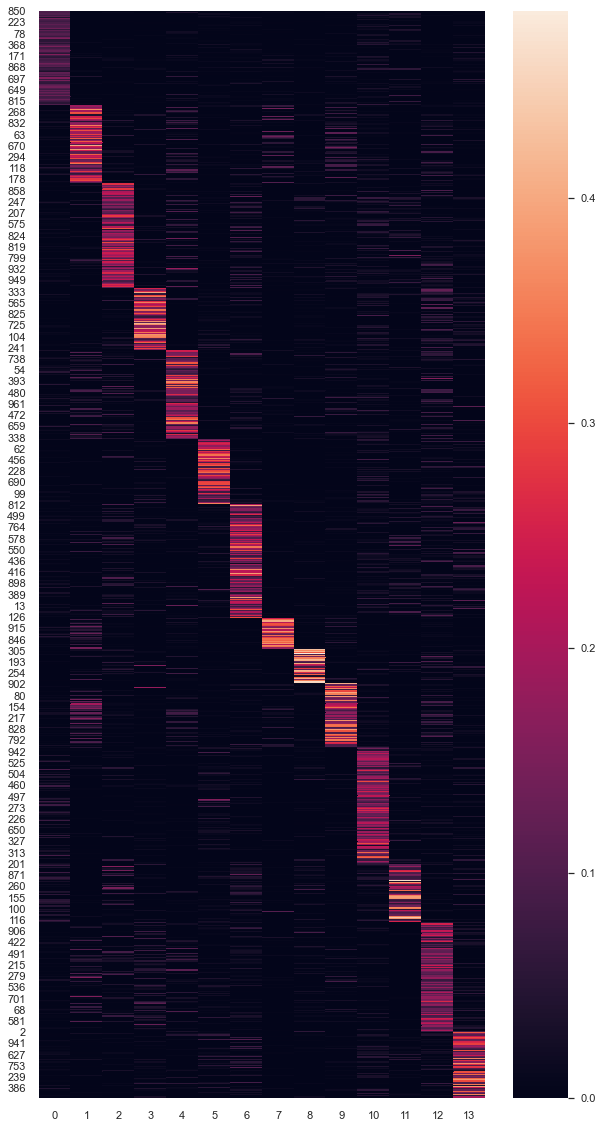

In [12]:
%matplotlib inline
import seaborn as sns; sns.set(rc={'figure.figsize':(10,20)})
sns.heatmap(document_topic_matrix.loc[document_topic_matrix.idxmax(axis=1).sort_values().index])

<AxesSubplot:>

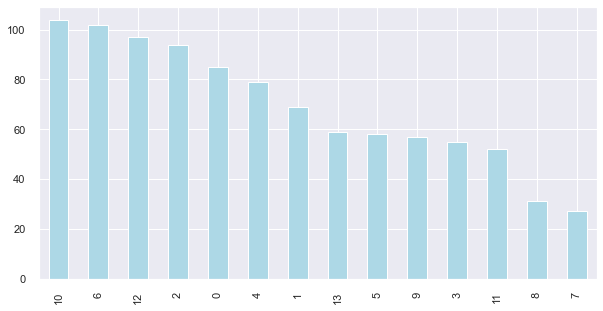

In [13]:
sns.set(rc={'figure.figsize':(10,5)})
document_topic_matrix.idxmax(axis=1).value_counts().plot.bar(color='lightblue')

In [14]:
X

array([[0.        , 0.        , 0.        , ..., 0.36095934, 0.        ,
        0.        ],
       [0.00192512, 0.22261559, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00142372, 0.        , 0.        , ..., 0.        , 0.07461229,
        0.07994665],
       ...,
       [0.        , 0.        , 0.02434191, ..., 0.        , 0.25071284,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.0037335 ,
        0.19756795]])

In [15]:
Y

array([[0.00328901, 0.00928386, 0.00909397, ..., 0.        , 0.        ,
        0.00283657],
       [0.        , 0.00352659, 0.00563329, ..., 0.00074877, 0.00488248,
        0.00065031],
       [0.00206298, 0.0044185 , 0.        , ..., 0.00950531, 0.        ,
        0.        ],
       ...,
       [0.00308648, 0.        , 0.        , ..., 0.02713376, 0.        ,
        0.        ],
       [0.00224527, 0.01174531, 0.00158541, ..., 0.03313712, 0.        ,
        0.00042585],
       [0.        , 0.00061924, 0.        , ..., 0.07623342, 0.00087953,
        0.        ]])